<a href="https://colab.research.google.com/github/KenDaupsey/Decision-Tree-Linear-Regression-and-Prediction-/blob/main/Decision_Tree_Linear_Regression_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Decision Tree Linear Regression and Prediction ***

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [5]:
#Load dataset
# import pandas as pd
url= "https://raw.githubusercontent.com/KenDaupsey/Decision-Tree-Linear-Regression-and-Prediction-/main/hsb2%7Edata.csv"
df= pd.read_csv(url)
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
### Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
read,200.0,52.230,10.252937,28.0,44.00,50.0,60.00,76.0
write,200.0,52.775,9.478586,31.0,45.75,54.0,60.00,67.0
math,200.0,52.645,9.368448,33.0,45.00,52.0,59.00,75.0
science,200.0,51.850,9.900891,26.0,44.00,53.0,58.00,74.0
socst,200.0,52.405,10.735793,26.0,46.00,52.0,61.00,71.0


In [8]:
### dataframe shape
df.shape

(200, 11)

In [9]:
df.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

In [10]:
df.isnull().sum()

id         0
female     0
race       0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
dtype: int64

In [11]:
# Displaying the correlation matrix table
correlation_matrix = df[['read', 'write', 'math', 'science', 'socst']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
              read     write      math   science     socst
read     1.000000  0.596776  0.662280  0.630158  0.621484
write    0.596776  1.000000  0.617449  0.570442  0.604793
math     0.662280  0.617449  1.000000  0.630733  0.544480
science  0.630158  0.570442  0.630733  1.000000  0.465106
socst    0.621484  0.604793  0.544480  0.465106  1.000000


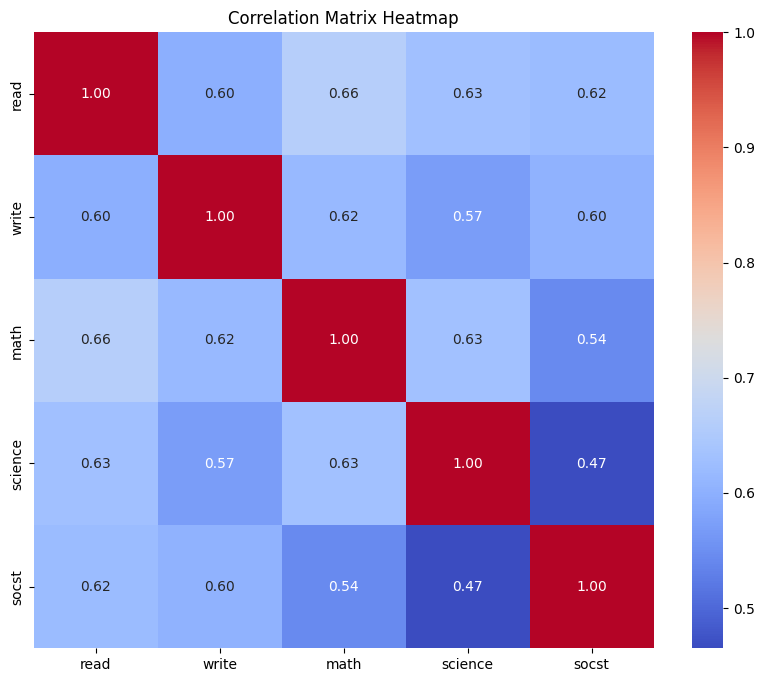

In [13]:
# Correlation matrix heatmap
import seaborn as sns
correlation_matrix = df[['read', 'write', 'math', 'science', 'socst']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
### Import the necessary modules from scikit-learn for implementing a Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

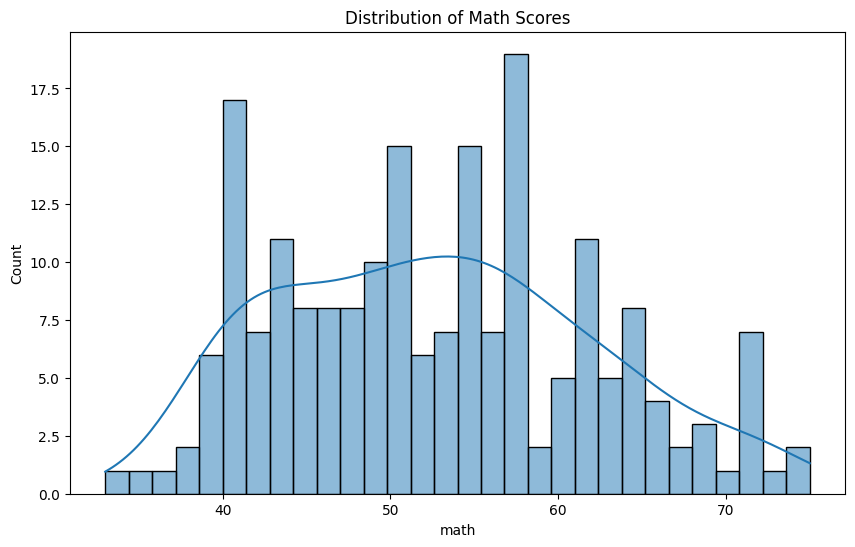

In [15]:
### Distribution of "math" Score
import seaborn as sns

# Example: Distribution of 'math' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['math'], bins=30, kde=True)
plt.title('Distribution of Math Scores')
plt.show()

In [16]:
# Selecting dependent variables
X = df[['read', 'write']]
y = df['math']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [17]:
# Displaying feature importance values in a tabular form
feature_importance = regressor.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
print("Feature Importance Table:\n", feature_importance_df)

Feature Importance Table:
   Feature  Importance
0    read     0.62132
1   write     0.37868


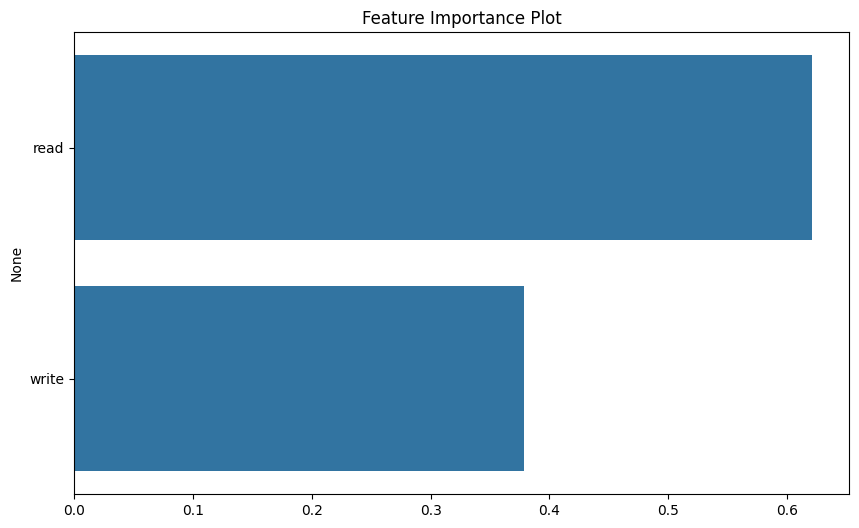

In [18]:
### Plot of Feature of Importance:
feature_importance = regressor.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, orient='h')
plt.title('Feature Importance Plot')
plt.show()

In [19]:
# Creating and fitting the Decision Tree Regression model with specified parameters
regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=5, min_samples_leaf=2, random_state=42)
regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(X_test)

In [20]:
# Displaying actual vs. predicted values in a tabular form
result_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})
print("Actual vs. Predicted Values (Decision Tree Regression):\n", result_df)

Actual vs. Predicted Values (Decision Tree Regression):
      Actual Values  Predicted Values
95              61         53.928571
15              43         45.900000
30              57         41.823529
158             42         41.823529
128             56         47.600000
115             37         41.823529
69              49         47.600000
170             45         45.900000
174             44         47.600000
45              63         57.666667
66              60         57.666667
182             57         62.750000
165             40         47.600000
78              46         41.823529
186             55         57.666667
177             54         45.900000
56              42         41.823529
152             40         53.928571
82              71         57.666667
68              59         49.500000
124             45         53.928571
16              51         47.600000
148             46         47.600000
93              52         41.823529
65              40

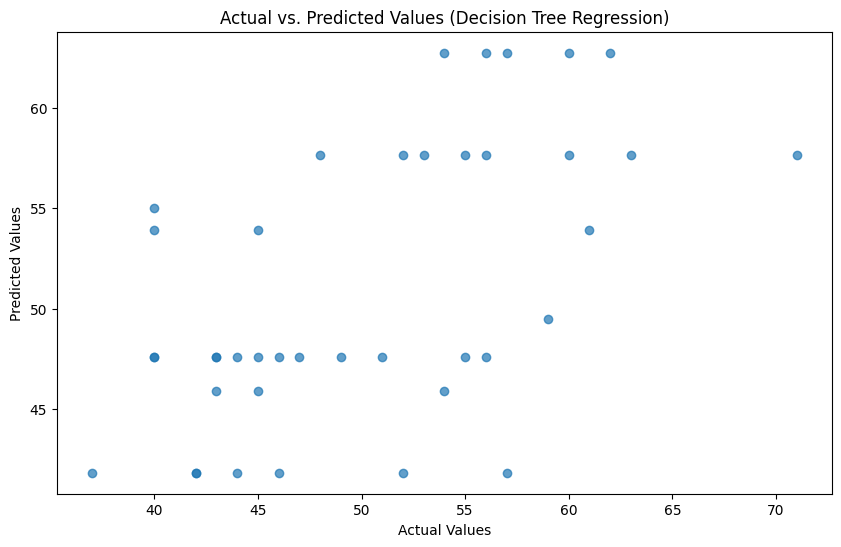

In [21]:
### Scatter Plot of Actual and Predicted Values:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Decision Tree Regression)')
plt.show()

In [22]:
# Calculating and printing the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 48.6181361098361


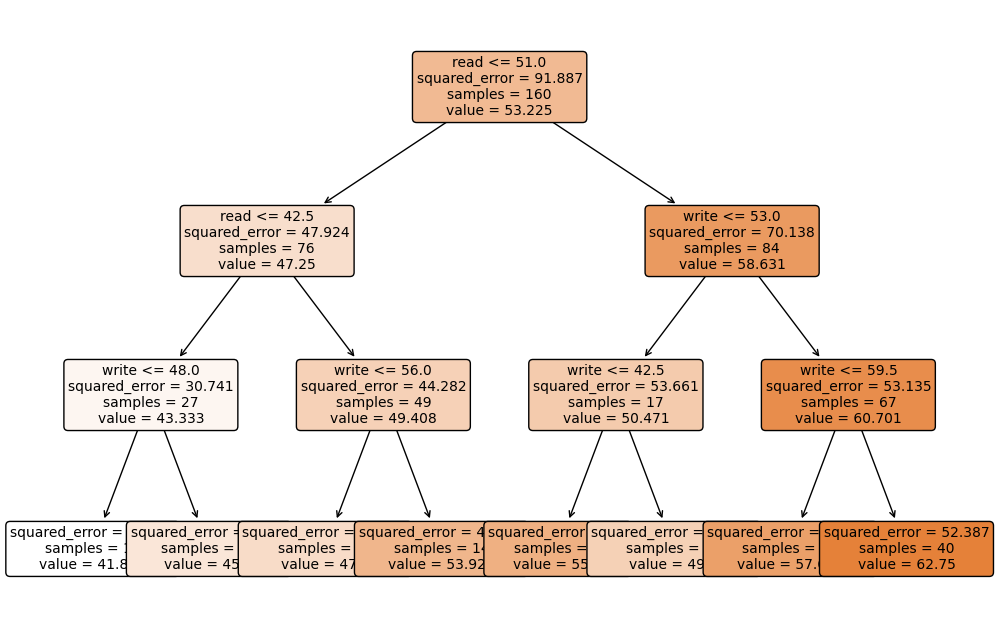

In [23]:
# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()

In [24]:
# Displaying the tabular version of the tree
tree_rules = export_text(regressor, feature_names=list(X.columns))
print(f"Decision Tree Rules:\n{tree_rules}")

Decision Tree Rules:
|--- read <= 51.00
|   |--- read <= 42.50
|   |   |--- write <= 48.00
|   |   |   |--- value: [41.82]
|   |   |--- write >  48.00
|   |   |   |--- value: [45.90]
|   |--- read >  42.50
|   |   |--- write <= 56.00
|   |   |   |--- value: [47.60]
|   |   |--- write >  56.00
|   |   |   |--- value: [53.93]
|--- read >  51.00
|   |--- write <= 53.00
|   |   |--- write <= 42.50
|   |   |   |--- value: [55.00]
|   |   |--- write >  42.50
|   |   |   |--- value: [49.50]
|   |--- write >  53.00
|   |   |--- write <= 59.50
|   |   |   |--- value: [57.67]
|   |   |--- write >  59.50
|   |   |   |--- value: [62.75]



# ** Predicting Specific Scenarios **

In [25]:
### Predicting Specific Scenarios
import pandas as pd

# Assuming 'df' is your original dataset

# Create a new data point with the same features as your training data
new_data_point = pd.DataFrame({'read': [80], 'write': [75]})

# Assuming you have trained a decision tree model named 'regressor'
# Predict using the decision tree
tree_prediction = regressor.predict(new_data_point)

# Display the result for Decision Tree
print(f"Prediction using Decision Tree: {tree_prediction[0]}")

Prediction using Decision Tree: 62.75


# **The End **